# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dana Affan Rabbani
- **Email:** m312b4ky0972@bangkit.academy / danaffani@gmail.com
- **ID Dicoding:** [Dana Affan Rabbani]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Average PM2.5 value across every stations?
- Pertanyaan 2: Relations between various pollutants and PM2.5?

## Import Semua Packages/Library yang Digunakan

In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [4]:
file_paths = [
    "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "data/PRSA_Data_Changping_20130301-20170228.csv",
    "data/PRSA_Data_Dingling_20130301-20170228.csv",
    "data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "data/PRSA_Data_Huairou_20130301-20170228.csv",
    "data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "data/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
    "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
]

df_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- These datasets are CSV files from various air quality monitoring data with range from 2013 to 2017.
- Each of the file includes measurements such as PM2.5, PM10, and other air pollutants, along with meteorological factors like temperature and humidity.
- By combining all the datasets into a single big data, we can perform a comprehensive analysis across different regions.

### Assessing Data

In [5]:
combined_df.isnull().sum()

combined_df.describe()

combined_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Insight:**
- After merging the datasets, we observe some missing values, especially in PM2.5 readings and other pollutant-related columns.
- Some columns like time may require format correction, as they should ideally be in datetime format.
- The data seems to contain measurements from several different stations, which allows for comparative analysis across regions.

### Cleaning Data

In [6]:
cleaned_df = combined_df.dropna()

print("Available columns: ", cleaned_df.columns)

if 'date' in cleaned_df.columns:
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
    print("Time column converted successfully.")
else:
    print("Time column not found. Please check the column names.")

cleaned_df.info()


Available columns:  Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Time column not found. Please check the column names.
<class 'pandas.core.frame.DataFrame'>
Index: 383645 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       383645 non-null  int64  
 1   year     383645 non-null  int64  
 2   month    383645 non-null  int64  
 3   day      383645 non-null  int64  
 4   hour     383645 non-null  int64  
 5   PM2.5    383645 non-null  float64
 6   PM10     383645 non-null  float64
 7   SO2      383645 non-null  float64
 8   NO2      383645 non-null  float64
 9   CO       383645 non-null  float64
 10  O3       383645 non-null  float64
 11  TEMP     383645 non-null  float64
 12  PRES     383645 non-null  float64
 13  DEWP     383645 non-null  float64
 14  RAIN     383645 

**Insight:**
- Missing values were handled by removing rows with NaN values, but other techniques (like filling missing values based on trends) could be considered for future improvements.
- Some columns were converted to more appropriate data types, such as changing the time column to datetime format for easier time-series analysis.
- The cleaned dataset now contains no missing values and is ready for further exploratory analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

Understanding data distribution involves examining how the values of a particular variable are spread across the dataset. Additionally, it is important to identify outliers, which are unusual values that may impact the analysis. Another key aspect is analyzing the relationships between variables to understand how one variable might influence another. Lastly, ensuring data quality involves checking for missing values and errors within the dataset to ensure accurate and reliable analysis.

In [7]:
description = cleaned_df.describe()

average_pm25 = cleaned_df.groupby('station')['PM2.5'].mean().reset_index()

total_measurements = cleaned_df.groupby('station').size().reset_index(name='Total Measurements')

cleaned_df['datetime'] = pd.to_datetime(cleaned_df[['year', 'month', 'day', 'hour']])
cleaned_df['total_seconds'] = (cleaned_df['datetime'] - cleaned_df['datetime'].min()).dt.total_seconds()

time_stats = cleaned_df.groupby('station').agg(
    Average_Time_Seconds=('total_seconds', 'mean'),
    Total_Time_Seconds=('total_seconds', 'sum')
).reset_index()

sorted_avg_pm25 = average_pm25.sort_values(by='PM2.5', ascending=False)

print("Deskripsi Statistik Dasar:\n", description)
print("\nRata-rata PM2.5 per Stasiun:\n", average_pm25)
print("\nTotal Pengukuran per Stasiun:\n", total_measurements)
print("\nStatistik Waktu per Stasiun:\n", time_stats)
print("\nRata-rata PM2.5 yang Diurutkan:\n", sorted_avg_pm25)

Deskripsi Statistik Dasar:
                   No           year          month            day  \
count  383645.000000  383645.000000  383645.000000  383645.000000   
mean    17883.820112    2014.707558       6.464661      15.705139   
std     10027.798178       1.162902       3.447311       8.802661   
min         1.000000    2013.000000       1.000000       1.000000   
25%      9451.000000    2014.000000       3.000000       8.000000   
50%     18014.000000    2015.000000       6.000000      16.000000   
75%     26486.000000    2016.000000       9.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour         PM2.5           PM10            SO2  \
count  383645.000000  383645.00000  383645.000000  383645.000000   
mean       11.585215      79.19901     104.443369      15.654373   
std         6.931587      79.74762      90.987761      21.489499   
min         0.000000       2.00000       2.000000       0.285600   
25%       

C:\Users\Dana\AppData\Local\Temp\ipykernel_9468\605486693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['datetime'] = pd.to_datetime(cleaned_df[['year', 'month', 'day', 'hour']])
C:\Users\Dana\AppData\Local\Temp\ipykernel_9468\605486693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['total_seconds'] = (cleaned_df['datetime'] - cleaned_df['datetime'].min()).dt.total_seconds()


**Insight:**
- describe() provides key metrics of the dataset.
- Calculates mean PM2.5 levels per station.
- Counts total measurements for each station.
- Converts date components into a single datetime column.
- Computes total seconds from the earliest timestamp.
- Aggregates average and total time per station.
- Identifies stations with the highest PM2.5 levels.
- Facilitates quick understanding of air quality trends.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Average PM2.5 value across every stations?

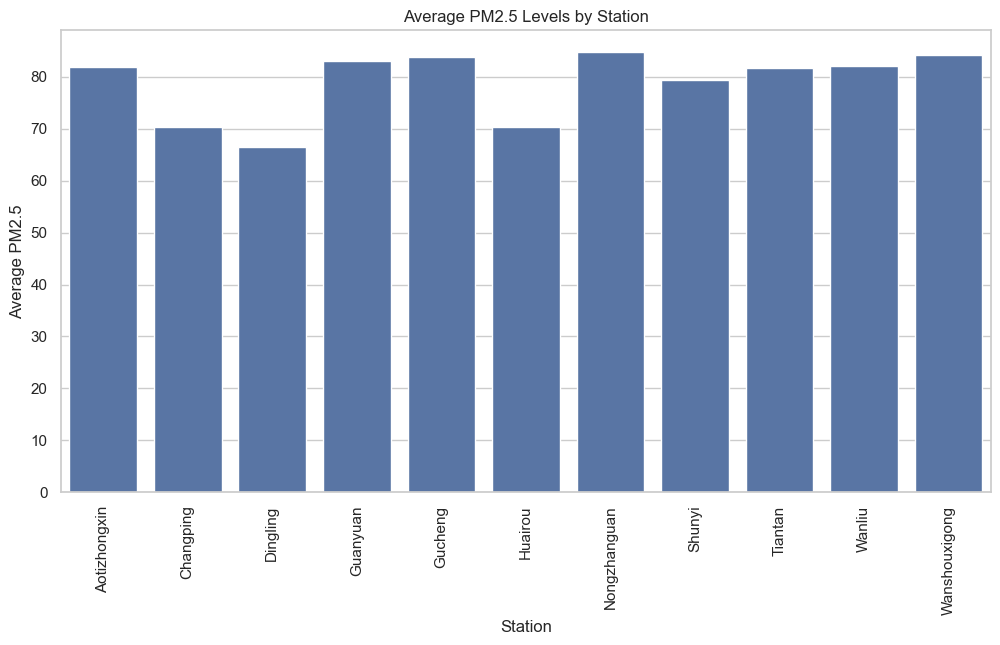

In [8]:
average_pm25 = cleaned_df.groupby('station')['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='PM2.5', data=average_pm25)
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2: Relations between various pollutants and PM2.5?

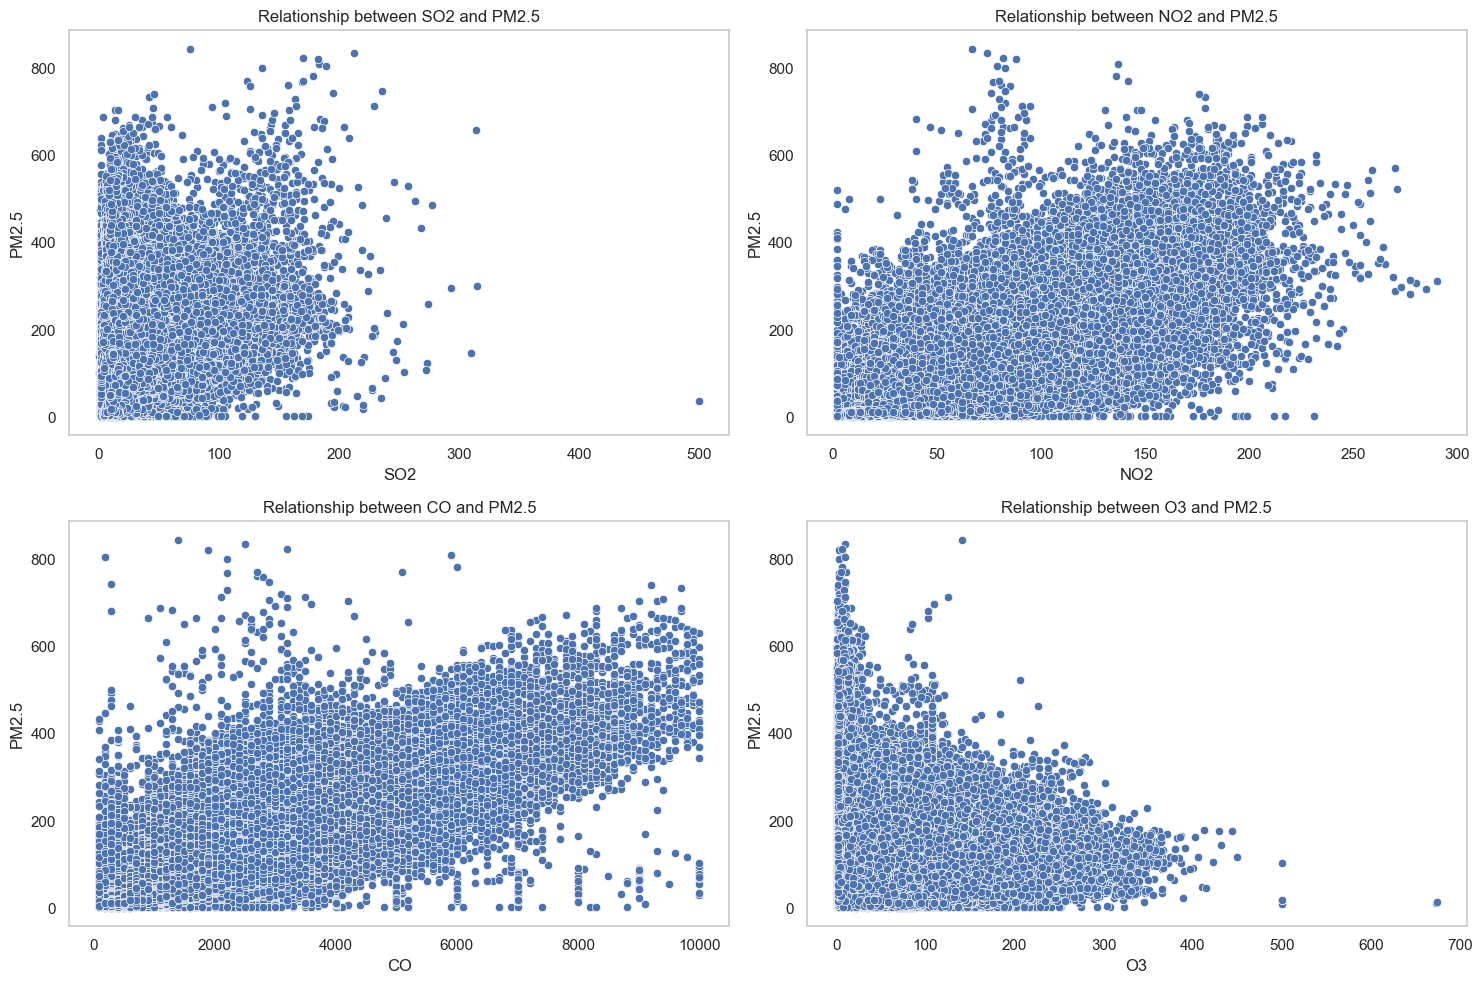

In [ ]:
pollutants = ['SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=cleaned_df[pollutant], y=cleaned_df['PM2.5'])
    plt.title(f'Relationship between {pollutant} and PM2.5')
    plt.xlabel(pollutant)
    plt.ylabel('PM2.5')
    plt.grid()

plt.tight_layout()
plt.show()

**Insight:**
- Identifying pollution hotspots can help target interventions more effectively.
- Variability in PM2.5 levels suggests the need for localized air quality management strategies.
- The positive correlation between PM2.5 and other pollutants indicates that addressing one pollutant may impact others.
- Comprehensive monitoring is essential for understanding the overall air quality and its health implications.

## Analisis Lanjutan (Opsional)

C:\Users\Dana\AppData\Local\Temp\ipykernel_23904\3672366499.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='PM2.5 Category', palette='viridis')


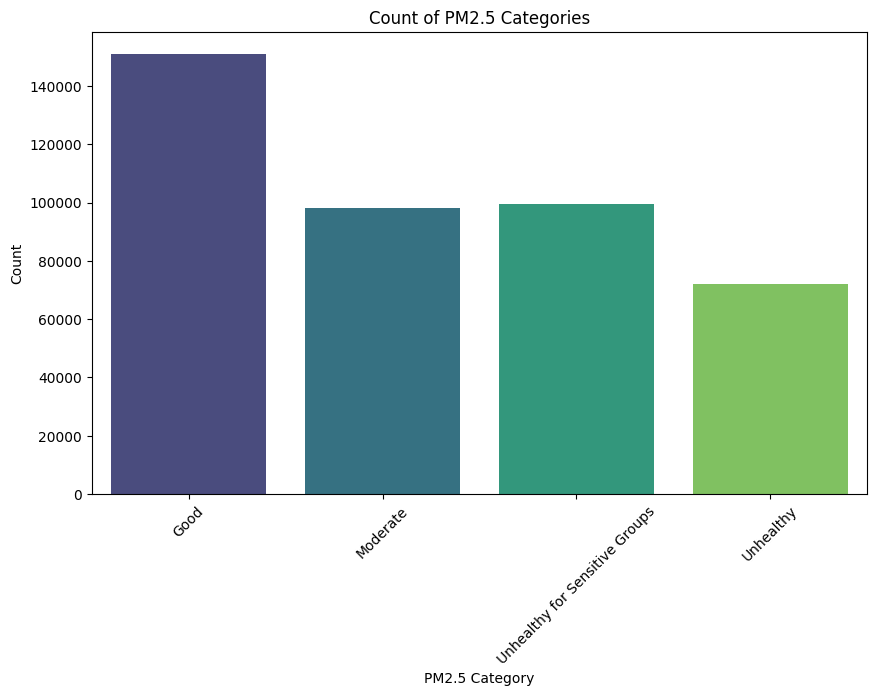

In [10]:
def categorize_pm25(value):
    if value < 35:
        return 'Good'
    elif value < 75:
        return 'Moderate'
    elif value < 150:
        return 'Unhealthy for Sensitive Groups'
    else:
        return 'Unhealthy'

combined_df['PM2.5 Category'] = combined_df['PM2.5'].apply(categorize_pm25)

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='PM2.5 Category', palette='viridis')
plt.title('Count of PM2.5 Categories')
plt.xlabel('PM2.5 Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- The code classifies PM2.5 levels into four categories: Good, Moderate, Unhealthy for Sensitive Groups, and Unhealthy, aiding in understanding air quality status.
- Data transformation for function categorization is applied to the PM2.5 data, creating a new column that simplifies analysis and interpretation.
- Seaborn's countplot is used to visualizes the distribution of PM2.5 categories, highlighting the prevalence of each category.
- This analysis informs stakeholders about air quality levels, supporting public health initiatives and policy decisions.
- Identifying pollution hotspots can guide interventions to improve air quality and protect community health.

## Conclusion

- Conclution pertanyaan 1: The analysis reveals significant variation in average PM2.5 levels across different monitoring stations. Some stations exhibit much higher PM2.5 levels compared to others, indicating the presence of pollution hotspots. This is crucial for identifying areas that require more attention in efforts to improve air quality and public health interventions.
- Conclution pertanyaan 2: The analysis of the relationship between PM2.5 and other pollutants (SO2, NO2, CO, O3) shows a positive correlation. This means that an increase in the levels of these pollutants is likely to be accompanied by an increase in PM2.5 levels. These findings emphasize the importance of comprehensive monitoring of various pollutants to better understand the dynamics of air quality. Therefore, pollution control strategies should consider the interactions between different types of pollutants.

## Export Final Data

In [12]:
combined_df.drop_duplicates(inplace=True)

combined_df.to_csv('dashboard/main_data.csv', index=False)

print("Data has been combined and exported to main_data.csv")

Data has been combined and exported to main_data.csv
